# 1. Algorytm k-means #

Algorytm k-means jest zaimplementowany w module *scipy.cluster.vq* ([*vq: vector quantization*](https://docs.scipy.org/doc/scipy/reference/cluster.vq.html)). Mamy tam funkcję:

*kmeans(obs, k_or_guess, iter=20, thresh=1e-05)*

optymalizującą położenia centroidów, oraz pomocniczą funkcję *vq*, przypisującą poszczególne obserwacje do skupisk reprezentowanych przez centroidy.

Przed zastosowaniem algorytmu k-means na danych dobrze jest przeskalować każdą z cech w macierzy wejściowej, tak aby miała jednostkową wariancję. Można to zrobić za pomoca funkcji [*whiten*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.whiten.html). Ten rodzaj normalizacji jest dedykowany do k-means.

###Przykładowy kod.###
Kod ten pokazuje jak:

*   wygenerować symulowane dane,
*   przeskalować je, tak aby miały jednostkową wariancję w każdej z cech,
*   podzielić je na dwa skupiska,
*   zilustrować wynik.

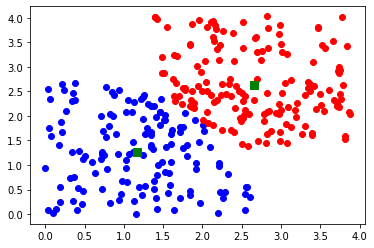

In [3]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq,whiten
import os
 
# generujemy dane: 
# - 150 dwuwymiarowych punktów z rozkładu jednorodnego ze średnią (1,1)
# - 150 dwuwymiarowych punktów z rozkładu jednorodnego ze średnią  (0.5,0.5)
 
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))
data =  whiten(data)
# policz K-Means dla  K = 2 (2 skupiska)
centroids,_ = kmeans(data,2)
# przypisz wektory wejściowe do skupisk
idx,_ = vq(data,centroids)
 
# narysuj wyniki
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

#2. Segmentacja obrazu algorytmem k-means#

W tym ćwiczeniu zapoznamy się z zastosowaniem algorytmu analizy skupień do segmetacji obrazu. Segmentacja tegotypu może stanowic etap wstępnego przetwarzania na potrzeby np. detekcji obiektów lub klasyfikacji. W zadaniu tym zapoznamy sie także z metodą dobierania atumatycznie ilości skupisk.


Obrazek na którym będziemy pracować znajduje się pod [tym](https://brain.fuw.edu.pl/edu/images/b/b8/Skan.png) adresem, proszę go zapisać w bieżącym katalogu, podłączyć dysk Google'a, zimportować i obejrzeć:

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
folder = '/content/drive/My Drive/' # podaj lokalizację obrazu
os.listdir('drive/My Drive')

['Classroom',
 'Maciej_Krajewski_02_Regresja_liniowa.ipynb',
 'Uczenie Maszynowe',
 'Wahadła Filmy',
 'Maciej_Krajewski_03_Regresja_logistyczna.ipynb',
 'Maciej_Krajewski_04_Miary_jakości (1).ipynb',
 'Maciej_Krajewski_05_Bayes_irysy (1).ipynb',
 'Colab Notebooks',
 'image.png']

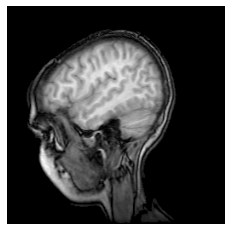

In [6]:
from pylab import plot,show,figure,imshow,cm, imread, axis
import matplotlib as plt
import numpy as np
from scipy.cluster.vq import kmeans,vq
 
image = imread(folder+ 'image.png')
# Oryginalny obrazek miał przestrzeń barwną RGB.
# Spłaszczamy przestrzeń barwną obrazka
image = image.mean(axis=2)
#oglądamy obrazek
imshow(image, cmap=cm.gray)
axis('off')
show()

Teraz zamieniamy rysunek (dwuwymiarowa tablica 256x256) na wektor (o długości 256*256):

In [7]:
data = image[:]
data.shape = 256*256,1

Teraz będziemy próbować podzielić ten wektor na skupiska (w liczbie od 2 do 9). Dla każdej konkretnej liczby skupisk obliczamy dwie wielkości:

$J_{intra} (K)$ - to jest miara odległości wewwnątrz centrów: równanie na $J$ znajduje się [tutaj](https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wyk%C5%82ad_10#Algorytm_k-.C5.9Brednich:).

$J_{inter} (K) = min_{j<i} \sqrt{(\mu_i - \mu_j)^T (\mu_i - \mu_j)} $ - to najmniejsza odległość między centrami.

In [8]:
K_max = 9
J_inter = np.ones(K_max)*1e16
J_intra = np.zeros(K_max)
centroids =[]
for K in range(2,K_max):
    trial =0
    while (len(centroids)<K) & (trial<20):
        centroids, J_intra[K] = kmeans(data,K)
        trial+=1
    print('K: ', K, len(centroids))
    for ki in range(len(centroids)):
        for kj in range(ki):
            print('ki ', centroids[ki])
            print('kj ',centroids[kj])
            ################
            ## dopisz kod obliczający odległość między centrami i oznacz ją d
            ################

            d = np.min(np.sqrt((centroids[ki] - centroids[kj]).T*((centroids[ki] - centroids[kj]))))
            # jeśli uzyskana odległość jest mniejsza niż dotychczas zapamiętana to ją zapamiętujemy:
            if J_inter[K] > d:
              J_inter[K] = d
    print(K, J_intra[K],J_inter[K])

K:  2 2
ki  [0.03241432]
kj  [0.5508229]
2 0.07526496797800064 0.5184085965156555
K:  3 3
ki  [0.00728229]
kj  [0.65194213]
ki  [0.27290425]
kj  [0.65194213]
ki  [0.27290425]
kj  [0.00728229]
3 0.03959263861179352 0.26562196016311646
K:  4 4
ki  [0.3819148]
kj  [0.1788884]
ki  [0.00224881]
kj  [0.1788884]
ki  [0.00224881]
kj  [0.3819148]
ki  [0.6802704]
kj  [0.1788884]
ki  [0.6802704]
kj  [0.3819148]
ki  [0.6802704]
kj  [0.00224881]
4 0.029156776145100594 0.176639586687088
K:  5 5
ki  [0.35619417]
kj  [0.7791392]
ki  [0.00224881]
kj  [0.7791392]
ki  [0.00224881]
kj  [0.35619417]
ki  [0.5841522]
kj  [0.7791392]
ki  [0.5841522]
kj  [0.35619417]
ki  [0.5841522]
kj  [0.00224881]
ki  [0.17680843]
kj  [0.7791392]
ki  [0.17680843]
kj  [0.35619417]
ki  [0.17680843]
kj  [0.00224881]
ki  [0.17680843]
kj  [0.5841522]
5 0.02205195091664791 0.17455962300300598
K:  6 6
ki  [0.2631457]
kj  [0.7846389]
ki  [0.13659708]
kj  [0.7846389]
ki  [0.13659708]
kj  [0.2631457]
ki  [0.41413626]
kj  [0.7846389]
k

Wykreślamy stosunek $J_{intra}/J_{inter}$ i znajdujemy $K$, dla którego jest najmniejszy:

5


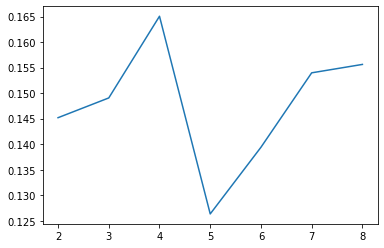

In [9]:
figure(1)
plot(range(2,K_max),J_intra[2:]/J_inter[2:])
K_opt = np.argmin(J_intra[2:]/J_inter[2:])+2
 
print(K_opt)

Dla tej optymalnej ilości skupisk znajdujemy położenia centrów i przypisujemy klasę dla każdego punktu danych:

In [22]:
centroids,J_intra[K] = kmeans(data, K_opt)
 
# przypisujemy klasę
idx,_ = vq(data,centroids)

Formatujemy wektor w obrazek i podziwiamy efekt:

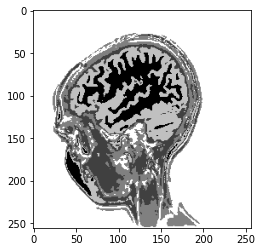

In [23]:
idx.shape = 256,256
figure(2)
imshow(idx, cmap=cm.gray)
 
show()

Dla porównania proszę wykreślić histogram odcieni szarości dla wektora *data* i wektora *idx*.

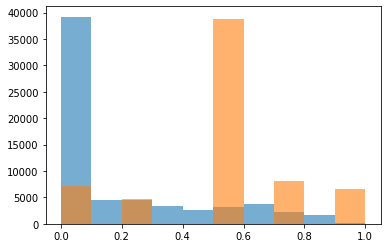

In [19]:
import matplotlib.pyplot as plt
idx_hist = idx
idx_hist.shape = 256*256,1
idx_hist = idx_hist/max(idx_hist)



plt.hist(data, 10,alpha = 0.6)  # arguments are passed to np.histogram
plt.hist(idx_hist, 10, alpha = 0.6)
plt.show()


Widać, że algorytm stworzył 5 przedziałów szarości, zgodnie z minimalizacją funkcji K. Przez to z płynnej skali szarości stworzył 5 jasno zdefiniowanych wartości.

Na zakończenie, napiszcie proszę własnymi słowami jak działa algorytm k-means. Może być kolokwialnie ;)

Algorytm ten składa się z kilku kroków:
1. wybór losowych miejsc skupisk w przestrzeni o wymiarowości równej wymiarowości danych. Liczba tych skupisk jest zadana przez nas, nie jest na razie optymalizowana (o tym jak wybierać odpowiednią ich liczbę będzie później).
2. na podstawie losowych punktów będących centrami skupisk przypisujemy punkty ze zbioru danych wg wzoru:
 c = argmin(||x - mi||^2),
 czyli przypisujemy punkt do najbliższego centrum
3. Po tej procedurze aktualizujemy położenie centrów poprzez obliczenie środka ciężkości punktów przypisanych do danego centrum. W ten sposób otrzymujemy nowe położenia centrów do wykorzystania w następnej iteracji
4. W przypadku tego algorytmu jego jakość klasyfikacji mierzymy poprzez minimalizację funkcji:
J(c,μ)=∑||x(j)−μc(j)||^2
Jest to sumowanie odległości wszystkich punktów od przypisanych im centrów. Im mniejsza wartość tej funkcji, tym lepszy podział danych (większe skupienie punktów wokół danego układu centrów)

Funkcja J nie jest wypukła, stąd by nie wpaść w pułapkę lokalnego minimum zalecane jest wystartowanie kilkukrotne z losowych miejsc, by znaleźć maksimum globalne.

By algorytm sam znajdował optymalną liczbę skupień należy dodatkowo obliczać zmianę miary jakości po dodaniu kolejnego skupiska. Wybieramy taką liczbę skupisk, po której zwiększeniu zmiany miary jakości są już mniejsze. 

Na przykładzie załączonego obrazka widać, że algorytm ten z płynnej skali szarości utworzył skokowe przejścia pomiędzy kolorami, czyli każdemu z punktów przypisał wartość z przedziału <0,1> w naszym przypadku w 5 stopniach (0.0, 0.2, 0.5, 0.8, 1.0).



# 3. Algorytm EM (Expectation Maximization) - dla chętnych#

Program, który powstanie po uzupełnieniu kodu powinien ilustrować dopasowywanie modelu EM do danych będzących sumą dwóch rozkładów gaussowskich.

Najpierw standardowe importy i kilka funkcji pomocniczych:

In [24]:
import matplotlib
import pylab as py
import random, copy
import numpy as np
import sys
 
 
def pnorm(x, m, s):
    """
    Oblicza gęstość wielowymiarowego rozkładu normalnego dla punktów
    w wektorze x
    Parametry rozkładu:
    m - średnia
    s- macierz kowariancji
    dla zwiększenia czytelności kodu stosujemy typ matrix
    """
    xm = np.matrix(x-m)
    xmt = np.matrix(x-m).transpose()
    for i in range(len(s)):
        if s[i,i] <= sys.float_info[3]: # min float
            s[i,i] = sys.float_info[3]
    sinv = np.linalg.inv(s)
 
    return (2.0*np.pi)**(-len(x)/2.0)*(1.0/np.sqrt(np.linalg.det(s)))\
            *np.exp(-0.5*(xm*sinv*xmt))
 
def draw_params(t,nbclusters):
        '''funkcja do losowania parametrów początkowych
        t - zbiór treningowy
        '''
        nbobs,nbfeatures = t.shape
        # inicjuje średnie przez losowanie punktu ze zbioru danych
        tmpmu = np.array([t[np.random.randint(0,nbobs),:]],np.float64)
        # kowariancje inicjowane są jako macierze diagonalne , wariancja dla każdej cechy inicjowana jest jako wariancja tej cechy dla całego zbioru 
        sigma = np.zeros((nbfeatures,nbfeatures))
        for f in range(nbfeatures):
            sigma[f,f] = np.var(t[:,f])
        #phi inicjujemy tak, że każda składowa mieszanki ma takie samee prawdopodobieństwo
        phi = 1.0/nbclusters
        print ('INIT:', tmpmu, sigma, phi)
        return {'mu': tmpmu,\
                'sigma': sigma,\
                'phi': phi}
 
def plot_gauss(mu,sigma):
    ''' Funkcja rysująca kontury funkcji gęstości prawdopodobieństwa 
       dwuwymiarowego rozkładu Gaussa'''
 
    x = np.arange(-6.0, 6.0001, 0.1)
    y = np.arange(-6.0, 6.0001, 0.1)
    X,Y = np.meshgrid(x, y)
    X.shape = 1,len(x)*len(y)
    Y.shape = 1,len(x)*len(y)
    P = np.vstack((X,Y))
    invS = np.linalg.inv(sigma)
    R = P.T-mu
    z = np.zeros(len(R))
    for i in range(len(R)):
        z[i] = np.exp(-0.5*np.dot( R[i,:].T,np.dot(invS,R[i,:])))
 
    z.shape = len(x),len(y)
    py.contourf(x,y,z,alpha = 0.5)
    py.plot(mu[0],mu[1],'o')

## Szkielet algorytmu ##
Poniższy kod to szkielet właściwej funkcji wykonującej optymalizację. Trzeba go uzupełnić implementując równania z wykładu. Proszę uważnie czytać komentarze.

In [28]:
def expectation_maximization(t, nbclusters=2, nbiter=3, normalize=False,
        epsilon=0.001, monotony=False, datasetinit=True):
    """
    t - zbiór treningowy, 
    Każdy wiersz t jest przykładem (obserwacją), każda kolumna to cecha 
    'nbclusters' ilość klastrów, z których budujemy model mieszany
    'nbiter' ilość iteracji
    'epsilon' kryterium zbieżności
 
     Powtórz kroki E i M aż do spełnienia warunku |E_t - E_{t-1}| < ε
 
    Funkcja zwraca parametry modelu (centra i macerze kowariancji Gaussów i ich wagi \phi) oraz 
    etykiety punktów zbioru treningowego oznaczające do którego z Gaussów w modelowanej mieszance należą.
    """
 
    nbobs,nbfeatures = t.shape
 
    ### Opcjonalna normalizacja
    if normalize:
        for f in range(nbfeatures):
            t[:,f] /= np.std(t[:,f])
 
 
    result = {}
    random.seed()
 
    # szykujemy tablice na prawdopodobieństwa warunkowe
    Pz = np.zeros((nbobs,nbclusters)) # P(z|x): opisywane równaniami (2) i (3) z wykładu 
    Px = np.zeros((nbobs,nbclusters)) # P(x|z): opisywane równaniem (4)  
 
    # inicjujemy parametry dla każdego składnika mieszanki
    # params będzie listą taką, że params[i] to słownik
    # zawierający parametry i-tego składnika mieszanki
    params = []
    for i in range(nbclusters):
        params.append( draw_params(t,nbclusters) )
 
    old_log_estimate = sys.maxsize                   # init
    log_estimate = sys.maxsize/2 + epsilon      # init
    estimation_round = 0    
 
    # powtarzaj aż zbiegniesz 
    while (abs(log_estimate - old_log_estimate) > epsilon\
                and (not monotony or log_estimate < old_log_estimate)):
        restart = False
        old_log_estimate = log_estimate   
        ########################################################
        # krok E: oblicz Pz dla każdego przykładu (czyli w oznaczeniach z wykładu w_i^j)
        ########################################################
        # obliczamy prawdopodobieństwa  Px[j,i] = P(x_j|z_j=i)  
        for j in range(nbobs): # iterujemy po przykładach
            for i in range(nbclusters): # iterujemy po składnikach
                Px[j,i] = pnorm(t[j,:], params[i]['mu'], params[i]['sigma']) #  (równanie 4)
 
        #  obliczamy prawdopodobieństwa Pz[j,i] = P(z_j=i|x_j)   
        #  najpierw licznik równania (3)   
        for j in range(nbobs): 
            for i in range(nbclusters):
                Pz[j,i] = Px[j,i]*params[i]['phi']
        #  mianownik równania (3)
        for j in range(nbobs): 
            tmpSum = 0.0
            for i in range(nbclusters):
                tmpSum += Px[j,i]*params[i]['phi']
        # składamy w całość Pz[j,i] = P(z_j=i|x_j)
            Pz[j,:] /= tmpSum
 
        ###########################################################
        # krok M: uaktualnij paramertry (sets {mu, sigma, phi}) #
        ###########################################################
        #print "iter:", iteration, " estimation#:", estimation_round,\
        #            " params:", params
        for i in range(nbclusters):
            print("------------------")
            # parametr phi: równanie (6)
            Sum_w = np.sum(Pz[:,i])
            params[i]['phi'] = Sum_w/nbobs
            if params[i]['phi'] <= 1.0/nbobs:           # restartujemy jeśli zanika nam któraś składowa mieszanki
                restart = True                          
                print("Restarting, p:",params[i]['phi'])
                break
            print('i: ',i,' phi: ', params[i]['phi'])
            # średnia: równanie (7)
            m = np.zeros(nbfeatures)
            for j in range(nbobs):
                m += Pz[j,i]*t[j,:]
            params[i]['mu'] = m/Sum_w
            print('i: ',i,' mu: ', params[i]['mu'])
 
            # macierz kowariancji: równanie (8)
            s = np.matrix(np.zeros((nbfeatures,nbfeatures)))
            for j in range(nbobs):
                roznica = np.matrix(t[j,:]-params[i]['mu'])
                s += Pz[j,i]*(roznica.T*roznica)
            params[i]['sigma'] = s/Sum_w
 
            print(params[i]['sigma'])
 
            ### Testujemy czy składniki się nie sklejają i w razie potrzeby restartujemy
            if not restart:
                restart = True
                for i in range(1,nbclusters):
                    if not np.allclose(params[i]['mu'], params[i-1]['mu'])\
                    or not np.allclose(params[i]['sigma'], params[i-1]['sigma']):
                        restart = False
                        break
            if restart:                
                old_log_estimate = sys.maxsize                 # init
                log_estimate = sys.maxsize/2 + epsilon    # init
                params = [draw_params(t,nbclusters) for i in range(nbclusters)] # losujemy nowe parametry startowe
                print('RESTART')
                continue
 
 
            ####################################
            # liczymy estymatę log wiarygodności: równaie (1)  #
            ####################################
            log_estimate = np.sum([np.log(np.sum(\
                    [Px[j,i]*params[i]['phi'] for i in range(nbclusters)]))\
                    for j in range(nbobs)])
            print("(EM) poprzednia i aktualna estymata log wiarygodności: ",\
                    old_log_estimate, log_estimate)
            estimation_round += 1
        ##########################
        #  rysujemy aktualny stan modelu
        ##########################
        py.ioff()
        py.clf()
        py.ion()
        for i in range(nbclusters):
            plot_gauss(np.array(params[i]['mu']),np.array(params[i]['sigma']))
        py.plot(x[:,0],x[:,1],'g.')
        py.axis('equal')
        py.draw()
 
 
        # Pakujemy wyniki
        result['quality'] = -log_estimate
        result['params'] = copy.deepcopy(params)
        result['clusters'] = [[o for o in range(nbobs)\
                if Px[o,c] == max(Px[o,:])]\
                for c in range(nbclusters)]
    return result

## Finalny program ##
Przykładowy program korzystający z powyższych funkcji:

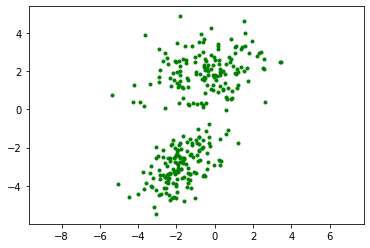

INIT: [[-3.35676572  1.30525226]] [[2.29368727 0.        ]
 [0.         7.10025278]] 0.5
INIT: [[-0.10426332  2.31874821]] [[2.29368727 0.        ]
 [0.         7.10025278]] 0.5
------------------
i:  0  phi:  0.44251673159865734
i:  0  mu:  [-2.16014318 -1.77382574]
[[0.99730069 0.45041004]
 [0.45041004 5.88417755]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1447.8084251199825
------------------
i:  1  phi:  0.5574832684013427
i:  1  mu:  [-0.2538518   0.57244611]
[[1.71464529 1.49772614]
 [1.49772614 5.62949299]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1428.8272002176059
------------------
i:  0  phi:  0.4528306451697465
i:  0  mu:  [-2.12767904 -1.7749644 ]
[[0.93695997 0.28254093]
 [0.28254093 5.90683174]]
(EM) poprzednia i aktualna estymata log wiarygodności:  -1428.8272002176059 -1208.6611299729282
------------------
i:  1  phi:  0.5471693548302534
i:  1  mu:  [-0.24478592  0.61761469]
[[1.81108376 1.63294

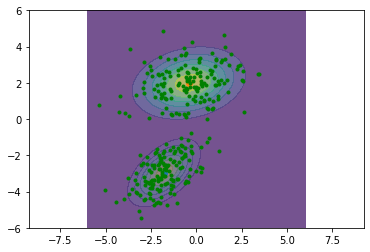

Dopasowany model: 
[{'mu': array([-1.78616893, -2.95336651]), 'sigma': matrix([[1.06526347, 0.54386158],
        [0.54386158, 0.93772778]]), 'phi': 0.4966246824163211}, {'mu': array([-0.41790299,  1.98836977]), 'sigma': matrix([[2.57588026, 0.35210527],
        [0.35210527, 1.05218285]]), 'phi': 0.5033753175836789}]


In [29]:
# robimy mieszankę dwóch gaussów:
#parametry rozkładu
# wektor średnich:
mu1 = [-2,-3] 
# macierz kowariancji:
Sigma1 = np.array([[1, 0.5],
                  [0.5, 1]])
# generujemy dane: 
x1 = np.random.multivariate_normal(mu1, Sigma1, 150) #
mu2 = [-0.5,2] 
# macierz kowariancji:
Sigma2 = np.array([[3, 0.5],
                  [0.5, 1]])
# generujemy dane: 
x2 = np.random.multivariate_normal(mu2, Sigma2, 150) #
# łączymy x1 i x2 aby otrzymac jeden zbiór
x = np.vstack((x1,x2))
py.plot(x[:,0],x[:,1],'g.')
py.axis('equal')
py.show()
py.figure()
res = expectation_maximization(x, nbclusters=2, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True)
py.ioff()
py.show()
# wypisz parametry
print('Dopasowany model: ')
print(res['params'])

Aby obliczyć gęstość prawdopodobieństwa rozkładu mieszanego dla pewnego nowego punktu "x" możemy zastosować poniższą funkcję:

In [30]:
def prob_mix(params, x):
    '''params - parametry dopasowanego gaussowskiego modelu mieszanego
    x - punkt wejścowy,
 
    funkcja zwraca gestość prawdopodobieństwa, dla x w rozkładzie mieszanym
    '''
    prob = 0
    for i in range(len(params)):
        prob+= pnorm(x, params[i]['mu'], params[i]['sigma']) * params[i]['phi']
 
 
    return prob
#---------------- przykładowe użycie: ----------------
x=(6,-4)
print('P(x=(',str(x),')):', prob_mix(res['params'], x))

P(x=( (6, -4) )): [[1.07322262e-15]]
